# **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# **Load Data**

In [ ]:
data_train = pd.read_csv('/content/train_adikara2024.csv')
data_test = pd.read_csv('/content/test_adikara2024_unlabeled.csv')
data_submission = pd.read_csv('/content/sample_submission_adikara2024.csv')

In [ ]:
print("TRAIN DATA")
data_train.sample(5)

TRAIN DATA


,id,Country,Year,Month,FoodPriceIndex
1315,1930,Israel,1971,1,0.0000
11011,4996,Germany,1972,9,40.8935
9005,78785,Finland,2012,5,95.8000
5475,39574,United Kingdom,1991,4,58.6000
2924,63730,Switzerland,2004,4,102.0000


In [ ]:
print("TEST DATA")
data_test.sample(5)

TEST DATA


,id,Country,Year,Month
1391,98937,France,2023,3
1078,88026,"Taiwan, China",2017,4
1796,88346,South Africa,2017,6
2615,96340,Luxembourg,2021,10
1112,87000,Finland,2016,10


In [ ]:
print("SUBMISSION SAMPLE")
data_submission.head()

SUBMISSION SAMPLE


,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


# **Data Information**

In [ ]:
print("informasi data train")
data_train.info()
data_train.describe()

informasi data train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11616 non-null  int64  
 1   Country         11616 non-null  object 
 2   Year            11616 non-null  int64  
 3   Month           11616 non-null  int64  
 4   FoodPriceIndex  11268 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 453.9+ KB


,id,Year,Month,FoodPriceIndex
count,11616.000000,11616.000000,11616.000000,11268.000000
mean,40919.409091,1991.500000,6.500000,54.084543
std,23626.188200,12.698972,3.452201,30.192230
min,7.000000,1970.000000,1.000000,0.000000
25%,20464.250000,1980.750000,3.750000,29.875000
50%,40921.500000,1991.500000,6.500000,60.300000
75%,61378.750000,2002.250000,9.250000,78.200000
max,81836.000000,2013.000000,12.000000,105.700000


In [ ]:
print("informasi data test")
data_test.info()
data_test.describe()

informasi data test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2640 non-null   int64 
 1   Country  2640 non-null   object
 2   Year     2640 non-null   int64 
 3   Month    2640 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 82.6+ KB


,id,Year,Month
count,2640.000000,2640.000000,2640.000000
mean,91139.409091,2018.500000,6.500000
std,5370.366774,2.872825,3.452707
min,81847.000000,2014.000000,1.000000
25%,86494.250000,2016.000000,3.750000
50%,91141.500000,2018.500000,6.500000
75%,95788.750000,2021.000000,9.250000
max,100436.000000,2023.000000,12.000000


In [ ]:
print("informasi data sample submission")
data_submission.info()
data_submission.describe()

informasi data sample submission
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2640 non-null   int64  
 1   FoodPriceIndex  2640 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 41.4 KB


,id,FoodPriceIndex
count,2640.000000,2640.0
mean,91139.409091,20.5
std,5370.366774,0.0
min,81847.000000,20.5
25%,86494.250000,20.5
50%,91141.500000,20.5
75%,95788.750000,20.5
max,100436.000000,20.5


# **DATA CLEANING & EDA**

In [ ]:
print("data train")
print(data_train.isna().sum())
print()
print("data test")
print(data_test.isna().sum())
print()
print("data submission")
print(data_submission.isna().sum())

data train
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64

data test
id         0
Country    0
Year       0
Month      0
dtype: int64

data submission
id                0
FoodPriceIndex    0
dtype: int64


# **Melihat distribusi kolom foodPriceIndex pada data train (banyak mothod)**

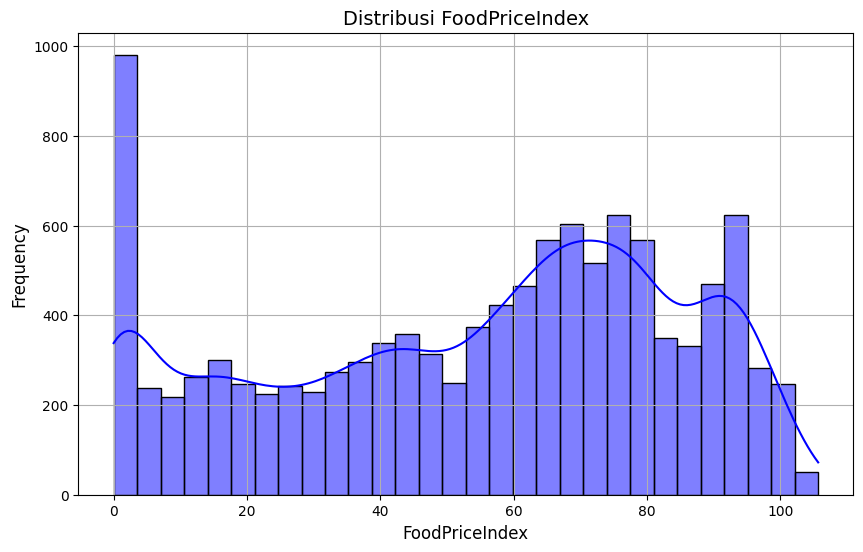

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data_train['FoodPriceIndex'], kde=True, bins=30, color='blue')
plt.title('Distribusi FoodPriceIndex', fontsize=14)
plt.xlabel('FoodPriceIndex', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

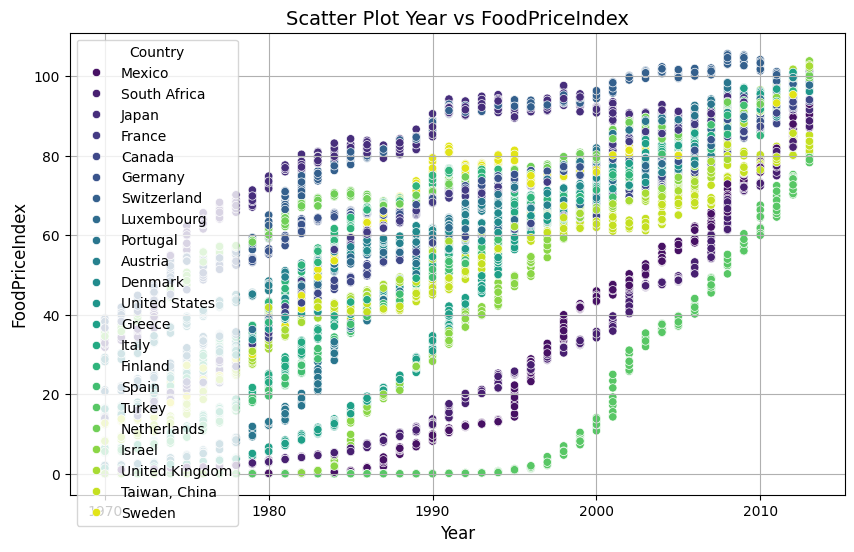

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Year', y='FoodPriceIndex', hue='Country', palette='viridis')
plt.title('Scatter Plot Year vs FoodPriceIndex', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('FoodPriceIndex', fontsize=12)
plt.grid(True)
plt.show()

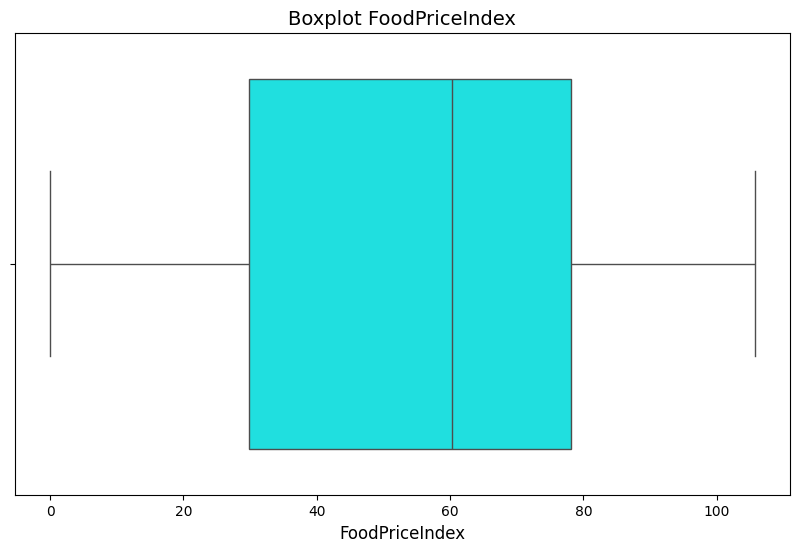

In [ ]:
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_train, x='FoodPriceIndex', color='cyan')
plt.title('Boxplot FoodPriceIndex', fontsize=14)
plt.xlabel('FoodPriceIndex', fontsize=12)
plt.show()


# **HANDLE NULL VALUE**

In [ ]:
from sklearn.linear_model import LinearRegression

# Copy the original dataset
data_train1 = data_train.copy()
data_train2 = data_train.copy()
data_train3 = data_train.copy()

# Menghapus value target yang null
data_train1 = data_train1.dropna(subset=['FoodPriceIndex'])
print("cek status data_train1")
print(data_train1.isna().sum())
print()

# Interpolasi Data
data_train2['FoodPriceIndex'] = data_train2['FoodPriceIndex'].interpolate(method='linear')
print("cek status data_train2")
print(data_train2.isna().sum())
print()

# Model prediktif untuk fill null value
# Pilih data yang tidak null (untuk melatih model)
train_dataFiller = data_train3[data_train3['FoodPriceIndex'].notnull()]

# Pilih data yang null (untuk diprediksi)
test_dataFiller = data_train3[data_train3['FoodPriceIndex'].isnull()]

# Periksa apakah ada nilai null
if test_dataFiller.shape[0] > 0:
    # Fitur dan target untuk training
    X_train = train_dataFiller[['Year']]
    y_train = train_dataFiller['FoodPriceIndex']

    # Fitur untuk testing
    X_test = test_dataFiller[['Year']]

    # Model Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi nilai null
    data_train3.loc[data_train3['FoodPriceIndex'].isnull(), 'FoodPriceIndex'] = model.predict(X_test)
    print("Prediksi selesai. Tidak ada lagi nilai null.")
else:
    print("Tidak ada nilai null untuk diproses.")

# Cek status null setelah pengisian
print("cek status data_train3")
print(data_train3.isna().sum())


cek status data_train1
id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64

cek status data_train2
id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64

Prediksi selesai. Tidak ada lagi nilai null.
cek status data_train3
id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64


# **VISUALISASI WAKTU DAN BULAN TERHADAP PRICE INDEX**

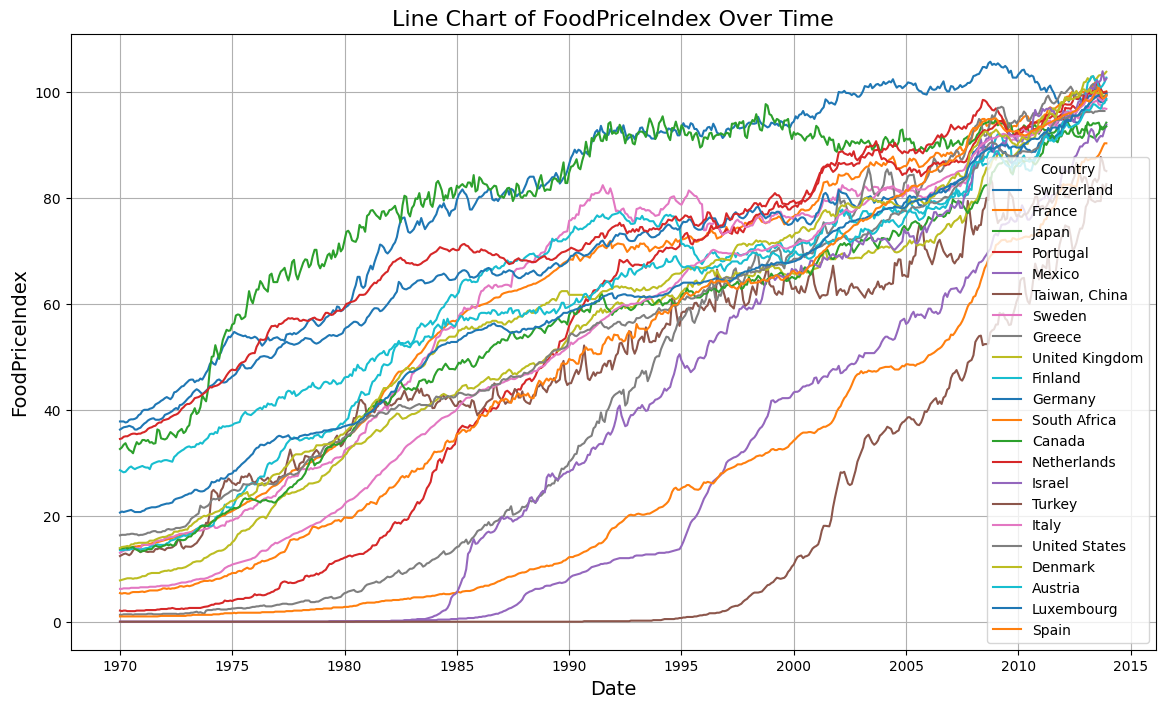

In [ ]:
train_data = data_train.copy()
# Konversi Year dan Month menjadi format datetime untuk visualisasi
train_data['Date'] = pd.to_datetime(train_data['Year'].astype(str) + '-' + train_data['Month'].astype(str) + '-01')

# Sort berdasarkan tanggal untuk visualisasi yang benar
train_data_sorted = train_data.sort_values(by='Date')

# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=train_data_sorted, x='Date', y='FoodPriceIndex', hue='Country', palette='tab10')
plt.title('Line Chart of FoodPriceIndex Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('FoodPriceIndex', fontsize=14)
plt.legend(title='Country', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
train_data

,id,Country,Year,Month,FoodPriceIndex,Date
0,3501,Mexico,1971,11,0.0000,1971-11-01
1,60601,South Africa,2002,7,43.9000,2002-07-01
2,64399,Japan,2004,8,89.8000,2004-08-01
3,24227,France,1983,1,48.9000,1983-01-01
4,63779,Japan,2004,4,90.2000,2004-04-01
...,...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000,1974-06-01
11612,32121,Germany,1987,4,66.1407,1987-04-01
11613,8561,Germany,1974,8,45.1606,1974-08-01
11614,45917,Denmark,1994,9,65.6000,1994-09-01


In [ ]:
data_train

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0000
1,60601,South Africa,2002,7,43.9000
2,64399,Japan,2004,8,89.8000
3,24227,France,1983,1,48.9000
4,63779,Japan,2004,4,90.2000
...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000
11612,32121,Germany,1987,4,66.1407
11613,8561,Germany,1974,8,45.1606
11614,45917,Denmark,1994,9,65.6000


# **CORRELATION MATRIX**

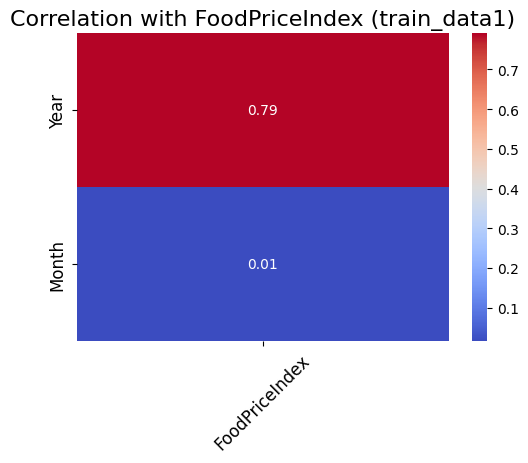

In [ ]:
# Pilih fitur dan target
features = ['Year', 'Month']  # Kolom fitur
target = 'FoodPriceIndex'  # Kolom target

# Hitung korelasi antara fitur dan target
correlation_with_target = data_train1[features + [target]].corr()[target].drop(target)

# Plot heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation with FoodPriceIndex (train_data1)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


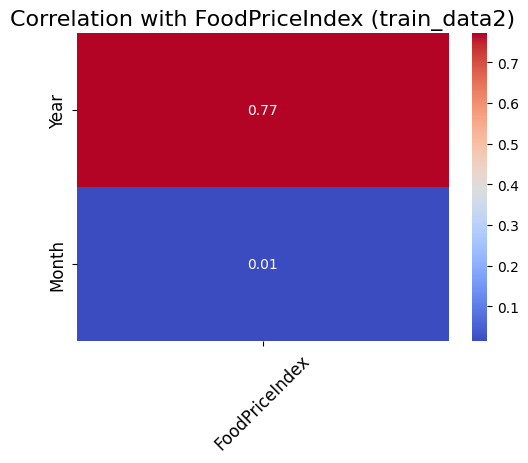

In [ ]:
# Pilih fitur dan target
features = ['Year', 'Month']  # Kolom fitur
target = 'FoodPriceIndex'  # Kolom target

# Hitung korelasi antara fitur dan target
correlation_with_target = data_train2[features + [target]].corr()[target].drop(target)

# Plot heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation with FoodPriceIndex (train_data2)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


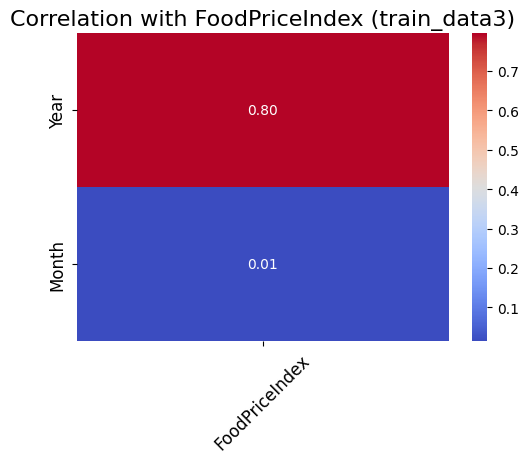

In [ ]:
# Pilih fitur dan target
features = ['Year', 'Month']  # Kolom fitur
target = 'FoodPriceIndex'  # Kolom target

# Hitung korelasi antara fitur dan target
correlation_with_target = data_train3[features + [target]].corr()[target].drop(target)

# Plot heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation with FoodPriceIndex (train_data3)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


# Modelling


Evaluating Linear Regression...


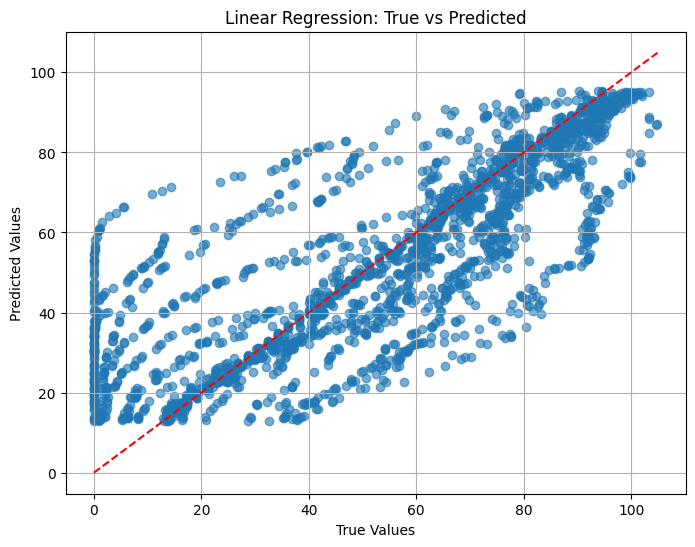

Mean Squared Error: 298.52340739566597
R-squared Score: 0.65224018650462
Training R^2: 0.6282052340376769
Validation R^2: 0.65224018650462
The model might be underfitting.

Evaluating Decision Tree...


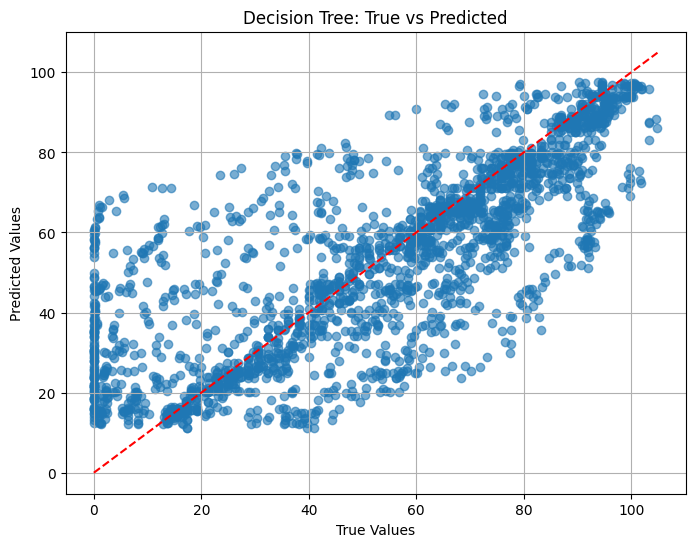

Mean Squared Error: 329.38415919201543
R-squared Score: 0.6162894736856375
Training R^2: 0.6354725100537497
Validation R^2: 0.6162894736856375
The model might be overfitting.

Evaluating Random Forest...


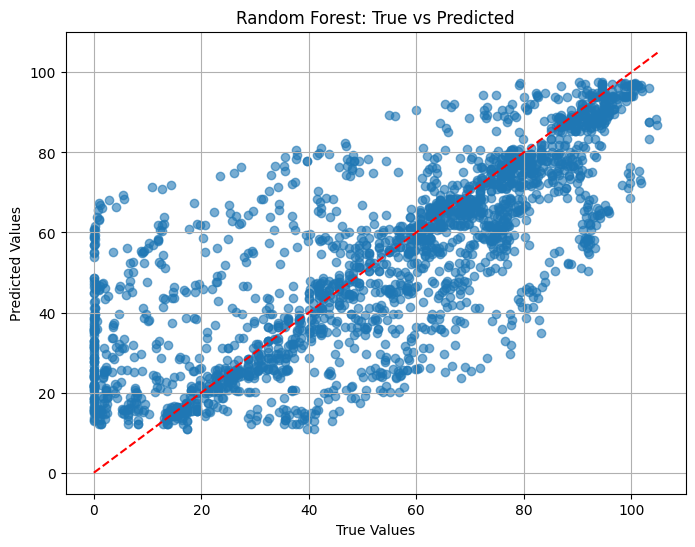

Mean Squared Error: 329.7320910320679
R-squared Score: 0.6158841563510227
Training R^2: 0.635246148730364
Validation R^2: 0.6158841563510227
The model might be overfitting.

Evaluating Gradient Boosting...


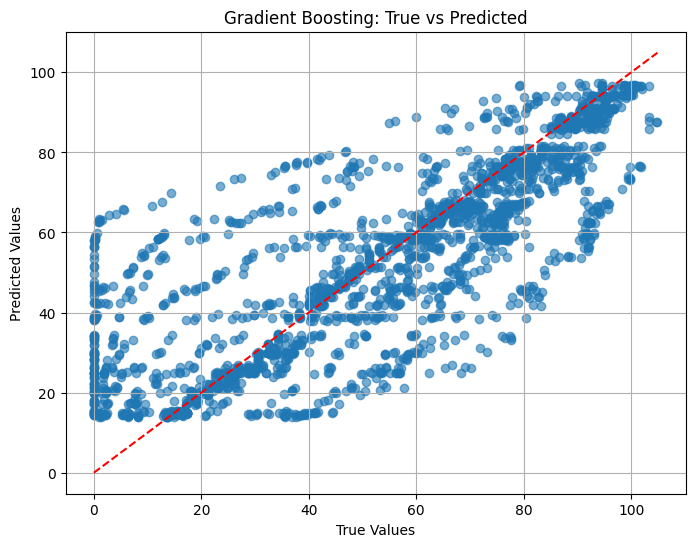

Mean Squared Error: 302.5925346330193
R-squared Score: 0.6474999252919527
Training R^2: 0.6320668069138682
Validation R^2: 0.6474999252919527
The model might be underfitting.

Evaluating Support Vector Regressor...


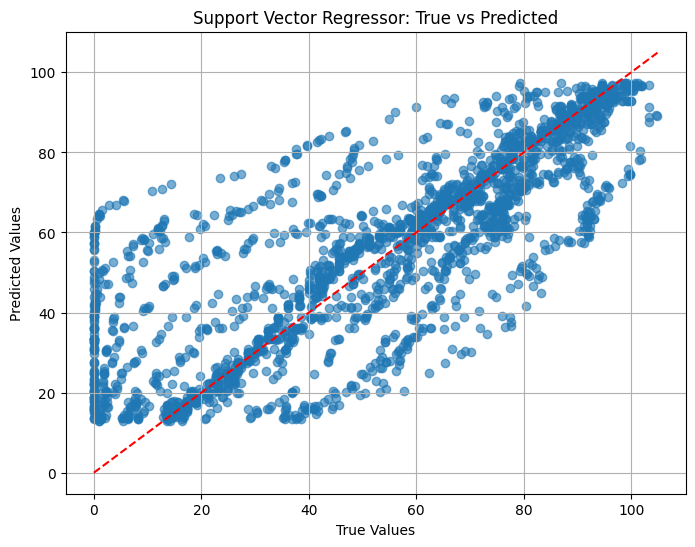

Mean Squared Error: 310.43028773412567
R-squared Score: 0.6383694668785158
Training R^2: 0.6204494434943297
Validation R^2: 0.6383694668785158
The model might be underfitting.

Evaluating K-Nearest Neighbors...


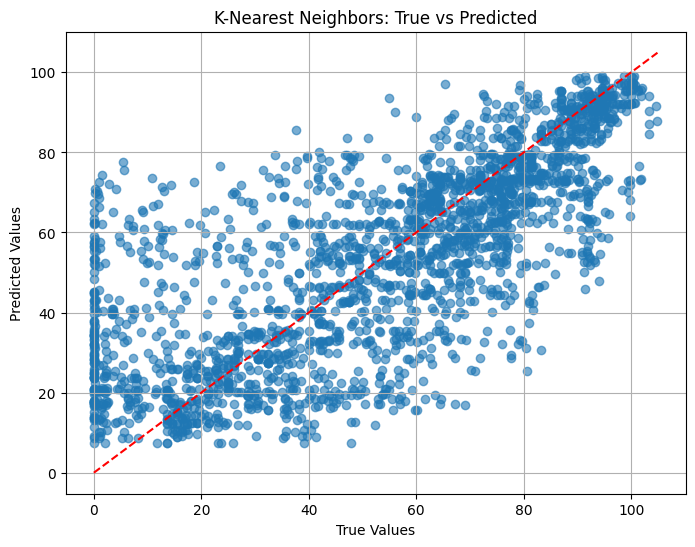

Mean Squared Error: 386.5794173265709
R-squared Score: 0.5496608214294665
Training R^2: 0.5801414922930433
Validation R^2: 0.5496608214294665
The model might be overfitting.

Best model: Linear Regression
MSE: 298.5234, R-squared: 0.6522
Submission file saved to submission.csv


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# Split data into features and target
X_train_full = data_train3[['Year', 'Month']]  # Fitur yang digunakan
y_train_full = data_train3['FoodPriceIndex']

# Data test hanya memiliki fitur dan ID
X_test = data_test[['Year', 'Month']]
test_ids = data_test['id']  # Simpan ID untuk keperluan submission

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Evaluate models and store performance
model_performance = {}
test_predictions = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val_scaled)

    # Metrics
    mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    # Plot true vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_val_pred, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')
    plt.title(f'{name}: True vs Predicted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

    # Print metrics
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Store model performance
    model_performance[name] = {
        'mse': mse,
        'r2': r2,
        'model': model
    }

    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    test_predictions[name] = y_test_pred

    # Overfit/Underfit Check
    train_score = model.score(X_train_scaled, y_train)
    val_score = model.score(X_val_scaled, y_val)
    print(f"Training R^2: {train_score}")
    print(f"Validation R^2: {val_score}")

    if train_score > val_score:
        print("The model might be overfitting.")
    elif train_score < val_score:
        print("The model might be underfitting.")
    else:
        print("The model seems well-fitted.")

# Select the best model based on MSE
best_model_name = min(model_performance, key=lambda name: model_performance[name]['mse'])
best_model = model_performance[best_model_name]['model']
final_predictions = test_predictions[best_model_name]

print(f"\nBest model: {best_model_name}")
print(f"MSE: {model_performance[best_model_name]['mse']:.4f}, R-squared: {model_performance[best_model_name]['r2']:.4f}")

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'FoodPriceIndex': final_predictions
})

# Save submission file
submission_file_path = 'submission.csv'  # Simpan di direktori kerja saat ini
submission.to_csv(submission_file_path, index=False)
print(f"Submission file saved to {submission_file_path}")



# Submission

In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'FoodPriceIndex': final_predictions
})

# Save submission file
submission_file_path = 'submission_farrell2.csv'
submission.to_csv(submission_file_path, index=False)
print(f"Submission file saved to {submission_file_path}")

Submission file saved to submission_farrell2.csv


# Export Model

In [ ]:
import joblib

# Save the best model to a file
model_filename = 'best_model2.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as best_model2.pkl
